# Intro to Python

## Let's start with the mandatory 'Hello World' – because tradition matters!

In [1]:
print('Hello World!')

Hello World!


## Libraries

### Install library
- ### Example Pandas, Polars, DuckDB 

In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### Install if not installed, Upgrade if installed and Upgrade dependencies

In [3]:
%pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.2
    Uninstalling matplotlib-3.8.2:
      Successfully uninstalled matplotlib-3.8.2
Note: you may need to restart the kernel to use updated packages.


### Is Library installed?

#### Specific library with detail

In [2]:
%pip show duckdb

Name: duckdb
Version: 1.2.2
Summary: DuckDB in-process database
Home-page: https://www.duckdb.org
Author: 
Author-email: 
License: MIT
Location: /home/trusted-service-user/jupyter-env/python3.11/lib/python3.11/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


#### List installed libraries

In [5]:
%pip list

Package                            Version
---------------------------------- --------------------
absl-py                            2.3.1
adlfs                              2023.4.0
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.11
aiosignal                          1.4.0
alembic                            1.16.5
altair                             5.4.1
annotated-types                    0.7.0
anyio                              4.10.0
archspec                           0.2.5
argon2-cffi                        25.1.0
argon2-cffi-bindings               25.1.0
arrow                              1.3.0
astor                              0.8.1
asttokens                          3.0.0
async-lru                          2.0.5
atpublic                           5.1
attrs                              25.3.0
azure-common                       1.1.28
azure-core                         1.29.4
azure-datalake-store               0.0.53
azure-identity               

#### List and filter using grep

In [6]:
%pip list | grep duck

duckdb                             1.2.2
Note: you may need to restart the kernel to use updated packages.


#### List that we can display and filter

In [7]:
# Method that gives us more options like displaying and filtering
# uses newer method and not ones that are deprecated

from importlib.metadata import distributions
import pandas as pd

packages = [(dist.metadata['Name'], dist.version) for dist in distributions()]
# Give human readable column names
df = pd.DataFrame(packages, columns=['Package', 'Version'])
display(df.sort_values('Package'))

### Import library - alias friendly shorter names (preference)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

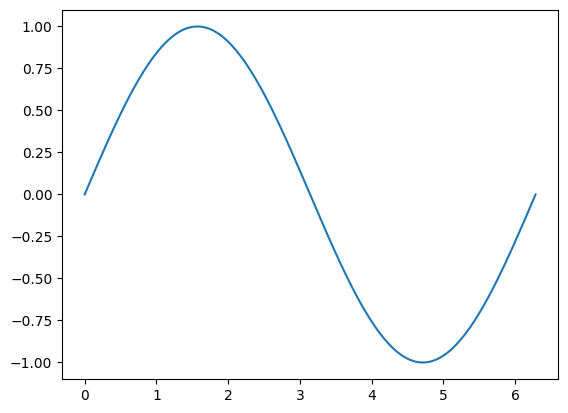

In [9]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

## Python is Object Orientated

### Variables

In [10]:
# Code for Variables

my_variable = 100
print(my_variable)

100


In [11]:
hello = "Hello World!"
print(hello)

Hello World!


### Functions

In [12]:
# Code for Functions
# We have already seen one: print()
# We apply this over the object
# Here is another

fruit = 'apple'
fruit_length = len(fruit)
print(fruit_length)

5


In [13]:
# We can create our own

def double(x):
    return x * 2

print(double(10))

20


### Methods - part of the object

In [14]:
# Code for Methods

name = "DAX Shepherd"
lowername = name.lower()    # Method to convert to lowercase
lowername.startswith("d")        


True

### Method Chaining

In [15]:
# Chaining

name = "DAX Shepherd"

#First convert to lowercase and then check if it start with lowercase "d"

name.lower().startswith("d")


True

### Chaining across lines

### **Method 1: Parenthesis '()'**

In [16]:
# Chaining across lines

# Very common in PySpark code
# Allows you to think about each transformtion you are doing

# Use the parenthesis '()'

name = "DAX Shepherd"

result = (
    name
    .lower()
    .startswith("d")
)

### **Method 2: Backslash '\\'**

In [17]:
# Chaining across lines

# Very common in PySpark code
# Allows you to think about each transformation you are doing

# Use the backslash '\'

name = "DAX Shepherd"

name \
    .lower() \
    .startswith("d")


True

### Accessing data from Pure Python notebook
- #### Drag table over
- #### Will see more in PySpark Notebook

In [ ]:
# Mount external lakehouse  "The_Anvil" into specified local path.
notebookutils.fs.mount("abfss://f651a469-ce2b-4682-af21-71fcc98961b0@onelake.dfs.fabric.microsoft.com/3e9ebe3d-fec4-4b73-80cd-4febd0a00762", "/lakehouse/The_Anvil")
import pandas as pd
# Load data into pandas DataFrame from notebookutils.fs.getMountPath('/lakehouse/The_Anvil/') + "Files/Legos/sets.csv"
df = pd.read_csv(notebookutils.fs.getMountPath('/lakehouse/The_Anvil/') + "Files/Legos/sets.csv")
display(df)


In [18]:
from deltalake import DeltaTable, write_deltalake
table_path = 'abfss://f651a469-ce2b-4682-af21-71fcc98961b0@onelake.dfs.fabric.microsoft.com/3e9ebe3d-fec4-4b73-80cd-4febd0a00762/Tables/sets' 
storage_options = {"bearer_token": notebookutils.credentials.getToken('storage'), "use_fabric_endpoint": "true"}
dt = DeltaTable(table_path, storage_options=storage_options)
limited_data = dt.to_pyarrow_dataset().head(1000).to_pandas()
display(limited_data)

# Write data frame to Lakehouse
# write_deltalake(table_path, limited_data, mode='overwrite')

# If the table is too large and might cause an Out of Memory (OOM) error,
# you can try using the code below. However, please note that delta_scan with default lakehouse is currently in preview.
# import duckdb
# display(duckdb.sql("select * from delta_scan('/lakehouse/default/Tables/dbo/bigdeltatable') limit 1000 ").df())

In [19]:
import duckdb
display(duckdb.sql("select * from delta_scan('/lakehouse/default/Tables/sets') limit 1000 ").df())

### Using DuckDB Example - adding our own SQL Code

In [20]:
import duckdb

duckdb.sql(
    """
    SELECT 
        set_num AS 'Set #',
        name AS 'Set Name',
        year AS 'Year'
    FROM delta_scan('/lakehouse/default/Tables/sets')
    WHERE name LIKE 'Ninjago%'
        AND year = '2022'
    LIMIT 10
    """
).df()

,Set #,Set Name,Year
0,0003977811-1,Ninjago: Book of Adventures,2022
1,9781780558752-1,Ninjago: Sssnake Time,2022
2,5007553-1,Ninjago: Build And Stick: NINJAGO Dragons,2022
3,9781760508807-1,Ninjago Legacy: Action in NINJAGO City,2022
4,9783960807230-1,Ninjago: Rätselbox 3,2022
5,9786180145809-1,Ninjago: Ninja Style,2022
6,342140-1,Ninjago Cole Minifigure Plush,2022
7,PILLOW-3,Ninjago: Lloyd Minifigure Cuddle Pillow,2022
8,4040873-1,Ninjago: Book of Adventures,2022
9,9783960806295-1,Ninjago: Stickerspass,2022


# What happens when your data is too big??

##